In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import os
x=[]
y=[]
stars={'conormcgregor':0,'kajal_agarwal':1,'sakshimalik':2,'sunnyleone':3,'viratkohli':4}
path='D:\Artificial_Intelligence\projects\scraped_img\celeb'
num=-1
for files in os.listdir(path):
     num+=1
     for i in os.listdir(path+'\\'+files):
            #print(i)
            pat=path+'\\'+files+'\\'+i
            img=cv2.imread(pat)
            img=cv2.resize(img,(32,32))
            org=img
            img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            img=np.float32(img)
            img/=255
            #plt.figure(figsize=(20,20))
            coef=pywt.wavedec2(img,'db1',level=5)
            coef_list=list(coef)
            coef_list[0]*=0
            jpg=pywt.waverec2(coef_list,'db1')
            jpg*=255
            jpg=np.uint8(jpg)
            jpg=cv2.resize(jpg,(32,32))
            comb=np.vstack((org.reshape(32*32*3,1),jpg.reshape(32*32,1)))
            x.append(comb)
            y.append(num)

x=np.array(x).reshape(len(x),4096)
x=np.float32(x)
print(x)
print(y)
x.shape


[[ 32.  42.  39. ...   3. 208. 229.]
 [ 73.  74.  71. ... 199. 203.  17.]
 [244. 147. 155. ...  87. 166.  73.]
 ...
 [253.   2.   1. ... 210. 232. 232.]
 [196.   3.   5. ... 255.   0.  10.]
 [168.  40.  43. ... 154. 154. 153.]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

(408, 4096)

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import cv2

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26)
pipe=Pipeline([('Scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
print(pipe.score(x_test,y_test))
print(classification_report(y_test,pipe.predict(x_test)))


0.8921568627450981
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.87      0.91      0.89        22
           2       0.91      0.89      0.90        36
           3       0.92      0.92      0.92        24
           4       1.00      0.71      0.83         7

    accuracy                           0.89       102
   macro avg       0.90      0.87      0.88       102
weighted avg       0.90      0.89      0.89       102



In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pipe.predict(x_test))
cm

array([[12,  1,  0,  0,  0],
       [ 1, 20,  1,  0,  0],
       [ 0,  2, 32,  2,  0],
       [ 0,  0,  2, 22,  0],
       [ 2,  0,  0,  0,  5]], dtype=int64)

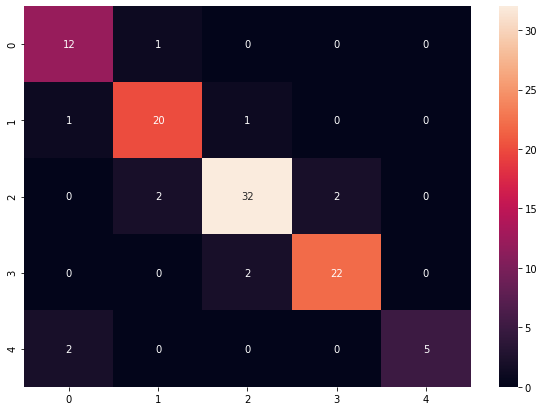

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)

In [27]:
import joblib 
joblib.dump(pipe,'first_machine.pkl')

['first_machine.pkl']